In [3]:
if __name__ == '__main__':
      import sys
      import numpy as np
      import matplotlib as mpl
      import matplotlib.pyplot as plt
      import pandas as pd
      import itertools as it
      import seaborn as sns
      from sklearn.cluster import KMeans
      from PyQt5 import QtWidgets
      sns.set_context('talk')
      np.warnings.filterwarnings("ignore")
if not QtWidgets.QApplication.instance():
      app = QtWidgets.QApplication(sys.argv)
else:
      app = QtWidgets.QApplication.instance()

In [11]:
pokemon = pd.read_csv('pokemon.csv')
a = pokemon.iloc[:, 0].values
b = pokemon.iloc[:, 4:11].values
pokemonArray = np.insert(b, 0, a, axis=1)

# Filtrage Préliminaire

In [33]:
class filtrage :
    def __init__(self, data:np.array)->None:
        """Attribution des valeurs à Original Data et modifiable data"""
        self._originalData = data
        self._lastData = data
        #renvoie la liste des valeurs minimales pour tous les axes, reshape pour forcer un vecteur
        minbound = np.amin(data, axis=0).reshape(-1,)
        maxbound = np.amax(data, axis=0).reshape(-1,)
        #a et b se baladent dans les liste des min et max, et renvoi liste de tuples pour chaque axes
        self._initialboundaries = [(a, b) for a, b in zip(minbound, maxbound)]
        self.modifiedData = data   
        return
    def brushing (self, bornes:list, last = True)->np.array:    
        temp = self._lastData if last else self._originalData
        for axe in range(self._originalData.shape[1]):
            temp = np.array([row for row in temp if  bornes[axe,0]<row[axe] and row[axe]<bornes[axe,1]])
        self._lastData = temp
        return temp
    def paretoMulti (self, axes:np.array, modified = True )->np.array:
        if modified == True :
            datas = self.modifiedData
        else:
            datas = self._originalData
        axes = np.sort(axes)#Tri des axes
        #Création de la liste des axes à enlever
        axesASupprimer = np.array([])
        for i in np.arange(datas.shape[1]):
            if i not in axes:
                axesASupprimer = np.append(axesASupprimer, i)
            #Suppresion des axes inutiles
        datasModif = np.delete(datas, axesASupprimer, 1)
            #Vérifier si les points sont pareto optimaux ou non
            #Retourne un tableau de booléen pour chaque point
            #Création du tableau de booléens, de la même taille que le nb de pts
        isPareto = np.ones(datasModif.shape[0], dtype =bool)
            #Créé le tableau de résultat qui contient uniquement les point Po*
            #print('is pareto ', isPareto)
        for i, value in enumerate(datasModif):
            for j, other_value in enumerate(datasModif):
                different_terms = (i!=j)#Il ne faut pas que deux points identiques se comparent entre eux
                if different_terms and isPareto[i] == True: #On sort dès que l'on trouve un comparaison Fausse
                    isPareto[i] = np.all(np.any(value>other_value))
        result = None
        for index,v in enumerate(isPareto):
            if v:
                if result is None:
                    # first term
                    result = np.copy(datas[index].reshape(1,-1))
                else:
                    # other terms
                    result = np.concatenate( (result,datas[index].reshape(1,-1)),axis=0 )
            #retour
        self.modifiedData = result
        return result

## Filtrage Min / Max

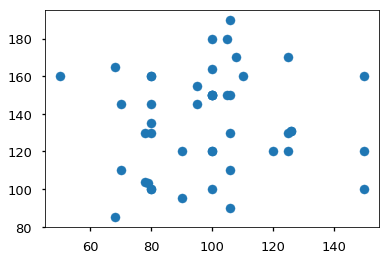

In [17]:
tryhard = filtrage(pokemonArray)

bornes =np.array([(0,800),
            (600,800),
         (0, 200),
         (0, 200),
         (0, 200),
         (0, 200),
         (0, 200),
         (0, 200)
         ])
test = tryhard.brushing(bornes)
plt.scatter(test[:,2], test[:,3])
plt.show()

## Filtrage de Pareto

In [36]:
tryhard = filtrage(pokemonArray)
choixPareto = np.array([2,3])#Liste des axes que l'on choisi pour Pareto
test = tryhard.paretoMulti(choixPareto)#Appel du filtrage pareto
test = test[test[:,2].argsort()]
plt.scatter(pokemonArray[:,2], pokemonArray[:,3], c='red')
plt.scatter(test[:,2], test[:,3],marker='+', c='black', label='MultiAxis Pareto')
plt.show()

TypeError: 'NoneType' object is not subscriptable